In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [2]:
df = pd.read_csv("Mall_Customers.csv")
data_len = len(df)
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


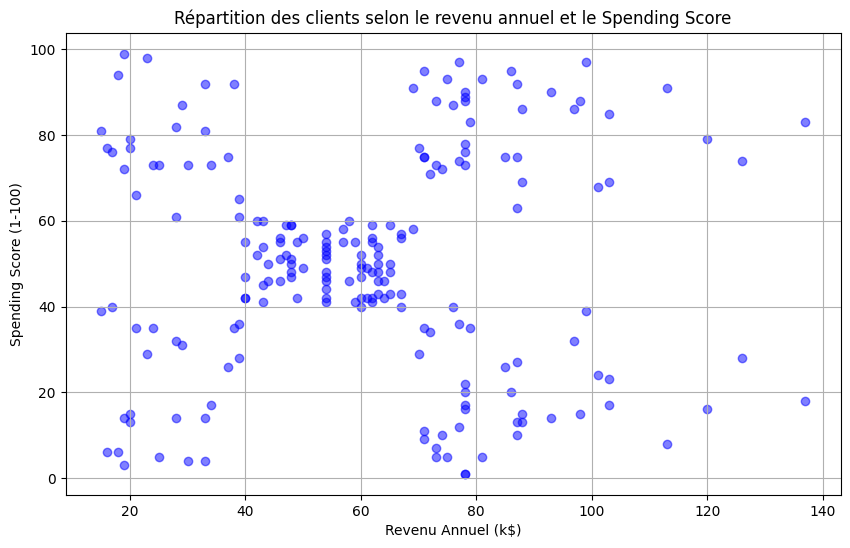

In [5]:
# Visualisation de la distribution des clients
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='b', alpha=0.5)
plt.title('Répartition des clients selon le revenu annuel et le Spending Score')
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [6]:
def initialize_centroids(data, k):
    if (k <= 0):
        return []
    indices = random.sample(range(len(data)), k)
    points = [(float(data.iloc[i]['Annual Income (k$)']), float(data.iloc[i]['Spending Score (1-100)'])) for i in indices]
    return points

In [7]:
centroids = initialize_centroids(df, 5)
print(centroids)

[(58.0, 60.0), (30.0, 4.0), (60.0, 47.0), (37.0, 75.0), (28.0, 32.0)]


In [8]:
def assign_clusters(data, centroids):
    labels = []
    for i in range(data_len):
        distances = [math.sqrt((data.iloc[i]['Annual Income (k$)'] - centroids[j][0])**2 + (data.iloc[i]['Spending Score (1-100)'] - centroids[j][1])**2) for j in range(len(centroids))]
        labels.append(centroids[distances.index(min(distances))])
    return labels

In [9]:
test = assign_clusters(df, centroids)
test[:20]

[(28.0, 32.0),
 (37.0, 75.0),
 (30.0, 4.0),
 (37.0, 75.0),
 (28.0, 32.0),
 (37.0, 75.0),
 (30.0, 4.0),
 (37.0, 75.0),
 (30.0, 4.0),
 (37.0, 75.0),
 (30.0, 4.0),
 (37.0, 75.0),
 (30.0, 4.0),
 (37.0, 75.0),
 (30.0, 4.0),
 (37.0, 75.0),
 (28.0, 32.0),
 (37.0, 75.0),
 (28.0, 32.0),
 (37.0, 75.0)]

In [10]:
def update_centroids(data, labels, centroids, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [j for j in range(data_len) if(labels[j] == centroids[i])]
        if (len(cluster_points) != 0):
            centroid_x = sum([data.iloc[j]['Annual Income (k$)'] for j in cluster_points]) / len(cluster_points)
            centroid_y = sum([data.iloc[j]['Spending Score (1-100)'] for j in cluster_points]) / len(cluster_points)
            new_centroids.append((float(centroid_x), float(centroid_y)))
        else :
            new_centroids.append((0, 0))
    return new_centroids

In [11]:
def kmeans(data, k, max_iter=100):
    centroids = initialize_centroids(data, k)

    for i in range(max_iter):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, centroids, k)
        centroids = new_centroids
    return labels, centroids

In [12]:
labels, centroids = kmeans(df, 5, max_iter=100)

clusters = [[i for i in range(data_len) if(labels[i] == centroid)] for centroid in centroids]

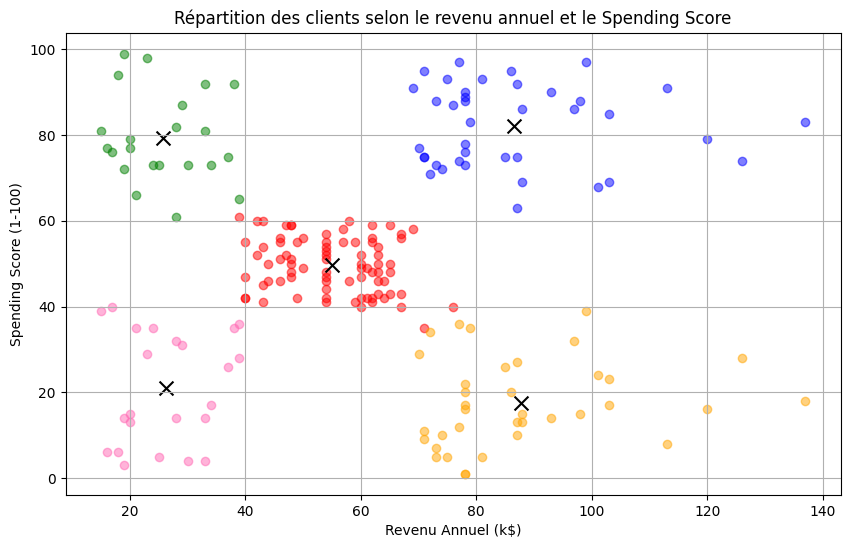

In [13]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'hotpink', 'orange', 'green']
for i in range(5):
    for j in clusters[i]:
        plt.scatter(df.iloc[j]['Annual Income (k$)'], df.iloc[j]['Spending Score (1-100)'], color=colors[i], alpha=0.5)
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='black', marker='x', s=100)
plt.title('Répartition des clients selon le revenu annuel et le Spending Score')
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.savefig('CustomersSegmentation.png')
plt.show()

# Customer Segmentation Analysis – Mall Customer Segmentation Data

## Introduction
The goal of this analysis is to segment shopping mall customers based on their income and purchasing behavior.  
We identified five distinct clusters after applying the **K-Means clustering algorithm**.  
Below is a detailed analysis of each segment and the associated strategic recommendations.

---

## Cluster 1: Earning High but Spending Less (Orange)

### Characteristics
- High income  
- Low spending score  

### Analysis
These customers may be more cautious in their purchases, preferring high-quality products but limiting overall spending.  
They are likely more selective, buying only products that match their specific needs.

### Recommended Strategy
- Offer **premium or luxury products**  
- Provide **personalized services** or value-added experiences  
- Use **loyalty programs** to encourage more frequent purchases  

---

## Cluster 2: Average in Terms of Earning and Spending (Red)

### Characteristics
- Average income  
- Moderate purchasing behavior  

### Analysis
This group represents a large portion of the customer base.  
They are moderate spenders, looking for quality products at affordable prices.  
They are sensitive to promotions and special offers.

### Recommended Strategy
- Provide **bundle deals** or **discounts**  
- Create **loyalty programs** to drive repeat buying  
- Offer **targeted promotions** on popular products  

---

## Cluster 3: Earning High and Spending High (Green) **[Target Set]**

### Characteristics
- High income  
- High spending score  

### Analysis
This group consists of the most profitable and engaged customers.  
They seek premium products and exclusive services.  
This is the **ideal target group** for marketing strategies.

### Recommended Strategy
- Provide **exclusive and premium products**  
- Create **tailor-made experiences** (VIP services, concierge, etc.)  
- Focus **advertising campaigns** specifically on this group  
- Encourage **repeat purchases** with personalized discounts  

---

## Cluster 4: Earning Less but Spending More (Blue)

### Characteristics
- Low income  
- High spending score  

### Analysis
Despite their lower income, they spend regularly.  
This may indicate a preference for frequent purchases at lower cost.

### Recommended Strategy
- Offer **affordable but attractive products**  
- Provide **frequent discounts**  
- Create **product bundles** or combined offers  
- Develop **loyalty programs** to encourage regular purchases  

---

## Cluster 5: Earning Less, Spending Less (Pink)

### Characteristics
- Low income  
- Low spending score  

### Analysis
This group is highly **price-sensitive**, prioritizing low-cost products and constantly searching for deals.

### Recommended Strategy
- Offer **low-priced products** or **promotions on essentials**  
- Create **limited-time offers** or **sales**  
- Set up **loyalty programs** that reward frequent purchases  
- Provide **financing options** to make purchases more accessible  

---

## Conclusion
This segmentation provides better insight into customer purchasing behavior and helps adopt marketing strategies tailored to each group.  
The proposed actions will help maximize **profitability** and **customer retention** by leveraging the specific characteristics of each cluster.
